**1.ANSWER**


Number of trucks in queue at various times :
[0, 1, 2, 1, 2, 3, 4, 3, 4, 5, 4, 5, 6, 7, 6, 7, 8, 7, 8, 9, 10, 9, 10, 11, 10, 11, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0]

All trucks served in time 0.5 hours


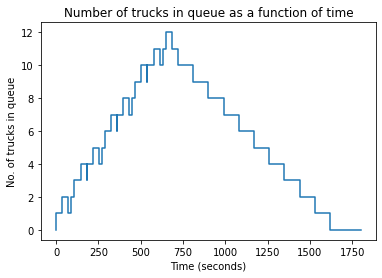

waiting_times_list =  [0, 54.0, 108.0, 162.0, 216.0, 270.0, 324.0, 378.0, 432.0, 486.0, 540.0, 594.0, 648.0, 702.0, 756.0, 810.0, 864.0, 918.0, 972.0, 1026.0]

average waiting time =  513.0

Standard deviation of waiting times is =  319.4683082873793


In [ ]:
import random 
import matplotlib.pyplot as plt  # for plotting.
from collections import deque
from statistics import stdev

# First create a data structure for a truck
class Truck:
  id = -1
  reach_bridge = 0
  start_bridge = -1
  exit_bridge = -1

  def __init__(self, id):
    self.id = id
 

# Main program
TOTAL_TRUCKS = 20
INTER_ARRIVAL_TIME = 0.4/40*3600 # in seconds   ##36.0
SERVICE_TIME = 0.5/20*3600 # in seconds         ##90.0
MY_INF = 1000000000
#print(INTER_ARRIVAL_TIME, SERVICE_TIME)

# start the simulation
before_bridge = deque()     #Empty queue at the beginning of the bridge  ## deque is a container class in Python which can hold a collection of python objects.
reach_bridge = deque()
waiting_times = []
event_times = []                            #This list will be containing the arrival and departure times sequentially.
num_in_sys = []

next_arrival = 0
next_id = 1
next_departure = MY_INF
total_served = 0
busy = False

while (total_served<TOTAL_TRUCKS):
  if (next_arrival<=next_departure):       
    time = next_arrival
    reach_bridge.append(time)
    tr = Truck(next_id)                     # 'tr' is the object reference variable.##here we have passed the argument next_id, assigning it to 'id' 
    before_bridge.append(tr)                # 'tr' being an obect reference variable, denotes the address of the object.   
    next_id += 1                            ##next_id += 1 => next_id = next_id + 1
    #print(time, "ARRIVAL", tr.id)
    if (tr.id>=TOTAL_TRUCKS):               # as soon as 20th truck reaches bridge,we have no more truks left with...so no more arrivals(or undefined)!!
      next_arrival = MY_INF                 #when all the trucks are exhusted,we dont know when will be the "next arrival of a new truck"??
    else:
      next_arrival += INTER_ARRIVAL_TIME     
    if (not busy):
      tr_serve = before_bridge.popleft()    #remove from the queue # before_bridge.popleft(): this returns an element which we have removed.
      #print("tr_serve :",tr_serve)
      tr_serve.start_bridge = time
      waiting_times.append(tr_serve.start_bridge-reach_bridge.popleft())
      busy = True                           #as soon as a truck starts moving over the bridge, system acts busy, until it exits the system.
      #print(time, "SERVICE", tr_serve.id)
      next_departure = time+SERVICE_TIME    # the moment a truck leves/exit the system, is the moment a new truck starts moving over the bridge.     
    event_times.append(time)                #appending the arrival times as long as it is <= departure times. 
    num_in_sys.append(len(before_bridge))   #adding the number of trucks before bridge
  else:                                     #when all the trucks are exhusted,we dont know when will be the "next arrival of a new truck"??
    time = next_departure                   # actually it gives the exit time of the truck.
    tr_serve.exit_bridge = time
    total_served += 1
    #print(time, "DEPARTURE", tr_serve.id)    
    next_departure = MY_INF                 # setting this value allows us to enter above if block. 
    if (len(before_bridge)>0):
      tr_serve = before_bridge.popleft() # remove from the queue
      tr_serve.start_bridge = time
      waiting_times.append(tr_serve.start_bridge-reach_bridge.popleft())
      busy = True
      #print(time, "SERVICE", tr_serve.id)
      next_departure = time+SERVICE_TIME
    event_times.append(time)
    num_in_sys.append(len(before_bridge))
    
print("\nNumber of trucks in queue at various times :")
print(num_in_sys)
print("\nAll trucks served in time", time/3600, "hours")

    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Number of trucks in queue as a function of time')
ax.set_ylabel('No. of trucks in queue')
ax.set_xlabel('Time (seconds)')
ax.step(event_times, num_in_sys, color='tab:blue')

plt.show()

print("waiting_times_list = ",waiting_times)
mean = sum(waiting_times)/len(waiting_times)
print("\naverage waiting time = ", mean)
print("\nStandard deviation of waiting times is = ",stdev(waiting_times))

Q.4 Suppose there is an option of adding a new lane on the bridge so that it can serve two trucks at a time (assume all traffic is one direction). In the new setting, the mean travel time increases to 240 seconds and standard deviation 50. Simulate the new system and check whether it performs better than the single lane system.

**2.ANSWER** \\
$$For \ \ Last-in-first-out $$

waiting_times =  [0, 18.0, 0.0, 18.0, 0.0, 18.0, 0.0, 18.0, 36.0, 162.0, 324.0, 486.0, 612.0, 774.0, 936.0, 1062.0, 1224.0, 1386.0, 1512.0, 1674.0]

average waiting time =  513.0

Standard deviation of waiting times is  589.0125545976794


Number of trucks in queue at various times :
[0, 1, 2, 1, 2, 3, 4, 3, 4, 5, 4, 5, 6, 7, 6, 7, 8, 7, 8, 9, 10, 9, 10, 11, 10, 11, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0]

All trucks served in time 0.5 hours


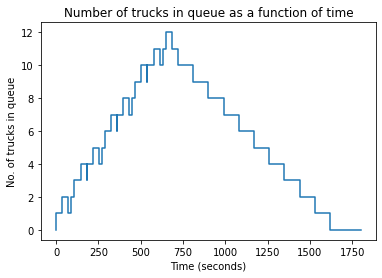

In [ ]:
# First create a data structure for a truck
class Truck:
  id = -1
  start_bridge = -1
  exit_bridge = -1

  def __init__(self, id):
    self.id = id
 

# Main program
TOTAL_TRUCKS = 20
INTER_ARRIVAL_TIME = 0.4/40*3600 # in seconds   ##36.0
SERVICE_TIME = 0.5/20*3600 # in seconds         ##90.0
MY_INF = 1000000000
#print(INTER_ARRIVAL_TIME, SERVICE_TIME)

# start the simulation
before_bridge = deque()     
reach_bridge = deque()
waiting_times = []
event_times = []                            
num_in_sys = []

next_arrival = 0
next_id = 1
next_departure = MY_INF
total_served = 0
busy = False

while (total_served<TOTAL_TRUCKS):
  if (next_arrival<=next_departure):       
    time = next_arrival
    reach_bridge.append(time)
    tr = Truck(next_id)                     
    before_bridge.append(tr)                
    next_id += 1                           
    #print(time, "ARRIVAL", tr.id)
    if (tr.id>=TOTAL_TRUCKS):              
      next_arrival = MY_INF          
    else:
      next_arrival += INTER_ARRIVAL_TIME     
    if (not busy):
      tr_serve = before_bridge.pop()    
      #print("tr_serve :",tr_serve,',',tr)
      tr_serve.start_bridge = time
      waiting_times.append(tr_serve.start_bridge-reach_bridge.pop())
      busy = True                           
      #print(time, "SERVICE", tr_serve.id)
      next_departure = time+SERVICE_TIME     
    event_times.append(time)                
    num_in_sys.append(len(before_bridge))   
  else:                                  
    time = next_departure                  
    tr_serve.exit_bridge = time
    total_served += 1
    #print(time, "DEPARTURE", tr_serve.id)    
    next_departure = MY_INF                 
    if (len(before_bridge)>0):
      tr_serve = before_bridge.pop() # remove from the queue
      tr_serve.start_bridge = time
      waiting_times.append(tr_serve.start_bridge-reach_bridge.pop())
      busy = True
      #print(time, "SERVICE", tr_serve.id)
      next_departure = time+SERVICE_TIME
    event_times.append(time)
    num_in_sys.append(len(before_bridge))

print("waiting_times = ",waiting_times)
print("\naverage waiting time = ",sum(waiting_times)/len(waiting_times))
print("\nStandard deviation of waiting times is ",stdev(waiting_times))
print()
print("\nNumber of trucks in queue at various times :")
print(num_in_sys)
print("\nAll trucks served in time", time/3600, "hours")

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Number of trucks in queue as a function of time')
ax.set_ylabel('No. of trucks in queue')
ax.set_xlabel('Time (seconds)')
ax.step(event_times, num_in_sys, color='tab:blue')

plt.show()

So, from the graph it is clear that **the plot of number of trucks in the queue is unaltered.** \\
**Average waiting time also remains same that is = 513,** \\
Only stndard deviation of the waiting time  changes

**3.ANSWER**

waiting_times =  [0, 80.33190844605619, 160.66381689211238, 240.9957253381685, 321.32763378422476, 401.659542230281, 481.99145067633714, 562.3233591223934, 642.6552675684495, 722.9871760145058, 803.319084460562, 883.650992906618, 963.982901352674, 1044.31480979873, 1124.6467182447864, 1204.9786266908422, 1285.3105351368986, 1365.6424435829545, 1445.9743520290108, 1526.3062604750667]
system_times =  [127.02747663537147, 207.35938508142766, 287.6912935274838, 368.02320197354, 448.35511041959626, 528.6870188656525, 609.0189273117086, 689.3508357577649, 769.682744203821, 850.0146526498773, 930.3465610959335, 1010.6784695419894, 1091.0103779880455, 1171.3422864341014, 1251.6741948801578, 1332.0061033262136, 1412.33801177227, 1492.6699202183258, 1573.0018286643822, 1653.333737110438]

average waiting time =  763.1531302375336

Standard deviation of waiting times is  475.24997949552204

average time spent by trucks in the system =  890.1806068729051

standard dev. of time spent by trucks in t

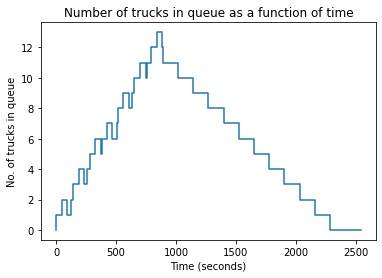

In [ ]:
# First create a data structure for a truck
class Truck:
  id = -1
  start_bridge = -1
  exit_bridge = -1
  def __init__(self, id):
    self.id = id
 
# Main program
TOTAL_TRUCKS = 20
INTER_ARRIVAL_TIME = random.expovariate(1/150)   
SERVICE_TIME =  random.normalvariate(mu=120, sigma=30)
MY_INF = 1000000000
#print(INTER_ARRIVAL_TIME, SERVICE_TIME)

# start the simulation
before_bridge = deque()     
reach_bridge = deque()
waiting_times = []
system_times = []
event_times = []                            
num_in_sys = []

next_arrival = 0
next_id = 1
next_departure = MY_INF
total_served = 0
busy = False

while (total_served<TOTAL_TRUCKS):
  if (next_arrival<=next_departure):        
    time = next_arrival
    reach_bridge.append(time)
    tr = Truck(next_id)                    
    before_bridge.append(tr)               
    next_id += 1                            
    #print(time, "ARRIVAL", tr.id)
    if (tr.id>=TOTAL_TRUCKS):               
      next_arrival = MY_INF               
    else:
      next_arrival += INTER_ARRIVAL_TIME     
    if (not busy):
      tr_serve = before_bridge.popleft()    
      #print("tr_serve :",tr_serve,',',tr)
      tr_serve.start_bridge = time
      waiting_times.append(tr_serve.start_bridge-reach_bridge.popleft())
      system_times.append(waiting_times[-1]+SERVICE_TIME)
      busy = True                           
      #print(time, "SERVICE", tr_serve.id)
      next_departure = time+SERVICE_TIME         
    event_times.append(time)                 
    num_in_sys.append(len(before_bridge))   
  else:                                     
    time = next_departure                   
    tr_serve.exit_bridge = time
    total_served += 1
    #print(time, "DEPARTURE", tr_serve.id)    
    next_departure = MY_INF                 
    if (len(before_bridge)>0):
      tr_serve = before_bridge.popleft() # remove from the queue
      tr_serve.start_bridge = time
      waiting_times.append(tr_serve.start_bridge-reach_bridge.popleft())
      system_times.append(waiting_times[-1]+SERVICE_TIME)
      busy = True
      #print(time, "SERVICE", tr_serve.id)
      next_departure = time+SERVICE_TIME
    event_times.append(time)
    num_in_sys.append(len(before_bridge))

print("waiting_times = ",waiting_times)
print("system_times = ",system_times)
print("\naverage waiting time = ",sum(waiting_times)/len(waiting_times))
print("\nStandard deviation of waiting times is ",stdev(waiting_times))
print("\naverage time spent by trucks in the system = ",sum(system_times)/len(system_times))
print("\nstandard dev. of time spent by trucks in the system = ",stdev(system_times))
print()
print("\nNumber of trucks in queue at various times :")
print(num_in_sys)
#print("\nAll trucks served in time", time/3600, "hours")

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Number of trucks in queue as a function of time')
ax.set_ylabel('No. of trucks in queue')
ax.set_xlabel('Time (seconds)')
ax.step(event_times, num_in_sys, color='tab:blue')

plt.show()

**4.ANSWER** 

In [ ]:
# First create a data structure for a truck
class Truck:
  id = -1
  start_bridge = -1
  exit_bridge = -1
  def __init__(self, id):
    self.id = id
 
# Main program
TOTAL_TRUCKS = 20
INTER_ARRIVAL_TIME = random.expovariate(1/150)   
SERVICE_TIME =  random.normalvariate(mu=240, sigma=50)
MY_INF = 1000000000
#print(INTER_ARRIVAL_TIME, SERVICE_TIME)

# start the simulation
before_bridge = deque()     
reach_bridge = deque()
waiting_times = []
system_times = []
event_times = []                            
num_in_sys = []

next_arrival = 0
next_id = 1
next_departure1 = MY_INF
next_departure2 = MY_INF
total_served = 0
lane1_busy = False
lane2_busy = False

while (total_served<TOTAL_TRUCKS):
  if (next_arrival<=min(next_departure1,next_departure2)):        
    time = next_arrival
    reach_bridge.append(time)
    tr = Truck(next_id)                    
    before_bridge.append(tr)               
    next_id += 1                            
    #print(time, "ARRIVAL", tr.id)
    if (tr.id>=TOTAL_TRUCKS):               
      next_arrival = MY_INF               
    else:
      next_arrival += INTER_ARRIVAL_TIME     
    if (not lane1_busy):
      tr_serve = before_bridge.popleft()    
      #print("tr_serve :",tr_serve,',',tr)
      tr_serve.start_bridge = time
      waiting_times.append(tr_serve.start_bridge-reach_bridge.popleft())
      #system_times.append(waiting_times[-1]+SERVICE_TIME)
      lane1_busy = True                           
      #print(time, "SERVICE", tr_serve.id)
      next_departure1 = time+SERVICE_TIME
    event_times.append(time)
    num_in_sys.append(len(before_bridge))     
    time = next_arrival
    reach_bridge.append(time)
    tr = Truck(next_id)                    
    before_bridge.append(tr)               
    next_id += 1                            
    #print(time, "ARRIVAL", tr.id)
    if (tr.id>=TOTAL_TRUCKS):               
      next_arrival = MY_INF               
    else:
      next_arrival += INTER_ARRIVAL_TIME 
    if (not lane2_busy):
      tr_serve = before_bridge.popleft()    
      #print("tr_serve :",tr_serve,',',tr)
      tr_serve.start_bridge = time
      waiting_times.append(tr_serve.start_bridge-reach_bridge.popleft())
      #system_times.append(waiting_times[-1]+SERVICE_TIME)
      lane2_busy = True                           
      #print(time, "SERVICE", tr_serve.id)
      next_departure2 = time+SERVICE_TIME         
    event_times.append(time)                 
    num_in_sys.append(len(before_bridge))   
  else:                                     
    if time == next_departure1:                   
      tr_serve.exit_bridge = time
      total_served += 1       
      next_departure = MY_INF                 
      if (len(before_bridge)>0):
        tr_serve = before_bridge.popleft() # remove from the queue
        tr_serve.start_bridge = time
        waiting_times.append(tr_serve.start_bridge-reach_bridge.popleft())
        system_times.append(waiting_times[-1]+SERVICE_TIME)
        lane1_busy = True
        next_departure = time+SERVICE_TIME
      event_times.append(time)
      num_in_sys.append(len(before_bridge))
    if time == next_departure2:
      tr_serve.exit_bridge = time
      total_served += 1       
      next_departure = MY_INF                 
      if (len(before_bridge)>0):
        tr_serve = before_bridge.popleft() # remove from the queue
        tr_serve.start_bridge = time
        waiting_times.append(tr_serve.start_bridge-reach_bridge.popleft())
        lane1_busy = True
        next_departure = time+SERVICE_TIME
      event_times.append(time)
      num_in_sys.append(len(before_bridge))

print("\naverage waiting time = ",sum(waiting_times)/len(waiting_times))
print("\nStandard deviation of waiting times is ",stdev(waiting_times))
print()
print("\nNumber of trucks in queue at various times :")
print(num_in_sys)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Number of trucks in queue as a function of time')
ax.set_ylabel('No. of trucks in queue')
ax.set_xlabel('Time (seconds)')
ax.step(event_times, num_in_sys, color='tab:blue')

plt.show()

double lane system performs well.